<a href="https://colab.research.google.com/github/JohnOliver23/DatasetsML/blob/master/projeto_topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =========== WINE =============
url_wine = "https://raw.githubusercontent.com/kmlporto/machinelearning/master/database/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# =========== BALANCE-SCALE =============
url_balance_scale = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/balance-scale.data"
col_names_balance_scale = ['label', 'x1', 'x2', 'x3', 'x4']
feature_cols_balance_scale = ['x1', 'x2', 'x3', 'x4']

# ========== ABALONE ===========
url_abalone = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/abalone.data"
col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

raw_dataset_wine = pd.read_csv( url_wine , header=None, names=col_names_wine) 
raw_dataset_balance_scale = pd.read_csv( url_balance_scale ,header=None, names=col_names_balance_scale) 
raw_dataset_abalone = pd.read_csv( url_abalone ,header=None, names=col_names_abalone)

In [104]:
# WINE DATASET TESTS

# Creating result vars 
wine_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

wine_x = raw_dataset_wine[feature_cols_wine]
wine_y = raw_dataset_wine.label

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_x, wine_y, test_size=0.2, random_state=None, stratify=wine_y) 


#Tree
wine_tree = tree.DecisionTreeClassifier()
wine_tree = wine_tree.fit(wine_x,wine_y)
wine_test_result = wine_tree.predict(x_test_wine)

#Taxa de acertos Three
wine_results['tree']    =  metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=5 

wine_knn5= KNeighborsClassifier(n_neighbors=5)
wine_knn5.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn5.predict(x_test_wine)

#Taxa de acertos Knn5
wine_results['knn5'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=10 
wine_knn10 = KNeighborsClassifier(n_neighbors=10)
wine_knn10.fit(wine_x,wine_y)
wine_test_result = wine_knn10.predict(x_test_wine)

#Taxa de acertos Knn10
wine_results['knn10'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP1 
wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
wine_mlp1.fit(wine_x,wine_y, )
wine_test_result = wine_mlp1.predict(x_test_wine)

wine_results['mlp1'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP2 
wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
wine_mlp2.fit(wine_x,wine_y)
wine_test_result = wine_mlp2.predict(x_test_wine)

wine_results['mlp2'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100


# Kmeans
wine_km = KMeans(n_clusters=3)
wine_km.fit(wine_x,wine_y)
wine_test_result = wine_km.predict(x_test_wine)


wine_results['kmeans'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, len(x_test_wine)):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(wine_results)


Iteration 1, loss = 242.63021348
Iteration 2, loss = 239.50638291
Iteration 3, loss = 236.40336244
Iteration 4, loss = 233.32095622
Iteration 5, loss = 230.25934325
Iteration 6, loss = 227.21870505
Iteration 7, loss = 224.19926255
Iteration 8, loss = 221.20120806
Iteration 9, loss = 218.22470389
Iteration 10, loss = 215.26988150
Iteration 11, loss = 212.33684077
Iteration 12, loss = 209.42564871
Iteration 13, loss = 206.53633746
Iteration 14, loss = 203.66890225
Iteration 15, loss = 200.82329954
Iteration 16, loss = 197.99944561
Iteration 17, loss = 195.19721557
Iteration 18, loss = 192.41644268
Iteration 19, loss = 189.65691776
Iteration 20, loss = 186.91838846
Iteration 21, loss = 184.20055820
Iteration 22, loss = 181.50308486
Iteration 23, loss = 178.82557917
Iteration 24, loss = 176.16760319
Iteration 25, loss = 173.52866909
Iteration 26, loss = 170.90823825
Iteration 27, loss = 168.30572107
Iteration 28, loss = 165.72047751
Iteration 29, loss = 163.15181843
Iteration 30, loss = 16

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 100.0, 'knn5': 66.66666666666666, 'knn10': 75.0, 'mlp1': 52.77777777777778, 'mlp2': 58.333333333333336, 'kmeans': 30.555555555555557}


In [105]:
# balance_scale DATASET TESTS

# Creating result vars 
balance_scale_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

balance_scale_x = raw_dataset_balance_scale[feature_cols_balance_scale]
balance_scale_y = raw_dataset_balance_scale.label

x_train_balance_scale, x_test_balance_scale, y_train_balance_scale, y_test_balance_scale = train_test_split(balance_scale_x, balance_scale_y, test_size=0.2, random_state=None, stratify=balance_scale_y) 


#Tree
balance_scale_tree = tree.DecisionTreeClassifier()
balance_scale_tree = balance_scale_tree.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_tree.predict(x_test_balance_scale)

#Taxa de acertos Three
balance_scale_results['tree']    =  metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=5 

balance_scale_knn5= KNeighborsClassifier(n_neighbors=5)
balance_scale_knn5.fit(x_train_balance_scale, y_train_balance_scale)
balance_scale_test_result = balance_scale_knn5.predict(x_test_balance_scale)

#Taxa de acertos Knn5
balance_scale_results['knn5'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=10 
balance_scale_knn10 = KNeighborsClassifier(n_neighbors=10)
balance_scale_knn10.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_knn10.predict(x_test_balance_scale)

#Taxa de acertos Knn10
balance_scale_results['knn10'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP1 
balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
balance_scale_mlp1.fit(balance_scale_x,balance_scale_y, )
balance_scale_test_result = balance_scale_mlp1.predict(x_test_balance_scale)

balance_scale_results['mlp1'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP2 
balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
balance_scale_mlp2.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_mlp2.predict(x_test_balance_scale)

balance_scale_results['mlp2'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100


# Kmeans
balance_scale_km = KMeans(n_clusters=3)
balance_scale_km.fit(balance_scale_x,balance_scale_y)
balance_scale_test_result = balance_scale_km.predict(x_test_balance_scale)


balance_scale_results['kmeans'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

x = raw_dataset_balance_scale.iloc[:, [1,2,3,4]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorBalanceScaleKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorBalanceScaleKm.append(kmeans.inertia_)

print(balance_scale_results)

Iteration 1, loss = 2.22566470
Iteration 2, loss = 2.08682075
Iteration 3, loss = 1.95957664
Iteration 4, loss = 1.84686078
Iteration 5, loss = 1.74391707
Iteration 6, loss = 1.65456973
Iteration 7, loss = 1.57633590
Iteration 8, loss = 1.50700702
Iteration 9, loss = 1.44473327
Iteration 10, loss = 1.39165818
Iteration 11, loss = 1.34283824
Iteration 12, loss = 1.29980697
Iteration 13, loss = 1.26091116
Iteration 14, loss = 1.22550463
Iteration 15, loss = 1.19358731
Iteration 16, loss = 1.16289946
Iteration 17, loss = 1.13367156
Iteration 18, loss = 1.10719419
Iteration 19, loss = 1.08243904
Iteration 20, loss = 1.05956497
Iteration 21, loss = 1.03893128
Iteration 22, loss = 1.01928658
Iteration 23, loss = 1.00107984
Iteration 24, loss = 0.98323839
Iteration 25, loss = 0.96576859
Iteration 26, loss = 0.94843359
Iteration 27, loss = 0.93098719
Iteration 28, loss = 0.91280261
Iteration 29, loss = 0.89529994
Iteration 30, loss = 0.87754645
Iteration 31, loss = 0.86044956
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 100.0, 'knn5': 85.6, 'knn10': 90.4, 'mlp1': 89.60000000000001, 'mlp2': 97.6, 'kmeans': 0.0}


In [107]:
# ABALONE DATASET TESTS

# Creating result vars 
abalone_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

abalone_x = raw_dataset_abalone[feature_cols_abalone]
abalone_y = raw_dataset_abalone.label

x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=None, stratify=abalone_y) 


#Tree
abalone_tree = tree.DecisionTreeClassifier()
abalone_tree = abalone_tree.fit(abalone_x,abalone_y)
abalone_test_result = abalone_tree.predict(x_test_abalone)

#Taxa de acertos Three
abalone_results['tree']    =  metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=5 

abalone_knn5= KNeighborsClassifier(n_neighbors=5)
abalone_knn5.fit(x_train_abalone, y_train_abalone)
abalone_test_result = abalone_knn5.predict(x_test_abalone)

#Taxa de acertos Knn5
abalone_results['knn5'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=10 
abalone_knn10 = KNeighborsClassifier(n_neighbors=10)
abalone_knn10.fit(abalone_x,abalone_y)
abalone_test_result = abalone_knn10.predict(x_test_abalone)

#Taxa de acertos Knn10
abalone_results['knn10'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP1 
abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
abalone_mlp1.fit(abalone_x,abalone_y, )
abalone_test_result = abalone_mlp1.predict(x_test_abalone)

abalone_results['mlp1'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP2 
abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
abalone_mlp2.fit(abalone_x,abalone_y)
abalone_test_result = abalone_mlp2.predict(x_test_abalone)

abalone_results['mlp2'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100


# Kmeans
abalone_km = KMeans(n_clusters=3)
abalone_km.fit(abalone_x,abalone_y)
abalone_test_result = abalone_km.predict(x_test_abalone)


abalone_results['kmeans'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

x = raw_dataset_abalone.iloc[:, [1,2,3,4,5,6,7,8]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorAbaloneKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorAbaloneKm.append(kmeans.inertia_)

print(abalone_results)


Iteration 1, loss = 1.14254894
Iteration 2, loss = 1.13684730
Iteration 3, loss = 1.13202689
Iteration 4, loss = 1.12748668
Iteration 5, loss = 1.12374707
Iteration 6, loss = 1.11957233
Iteration 7, loss = 1.10645312
Iteration 8, loss = 1.08838833
Iteration 9, loss = 1.04773172
Iteration 10, loss = 1.02401203
Iteration 11, loss = 1.00433952
Iteration 12, loss = 0.98661885
Iteration 13, loss = 0.97212366
Iteration 14, loss = 0.95965295
Iteration 15, loss = 0.94866223
Iteration 16, loss = 0.93956178
Iteration 17, loss = 0.93139888
Iteration 18, loss = 0.92508201
Iteration 19, loss = 0.91710295
Iteration 20, loss = 0.91127356
Iteration 21, loss = 0.90707106
Iteration 22, loss = 0.90117721
Iteration 23, loss = 0.89824092
Iteration 24, loss = 0.89534642
Iteration 25, loss = 0.89220609
Iteration 26, loss = 0.88951915
Iteration 27, loss = 0.88748734
Iteration 28, loss = 0.88548483
Iteration 29, loss = 0.88396924
Iteration 30, loss = 0.88430418
Iteration 31, loss = 0.88167444
Iteration 32, los

# **Relatório de desempenho dos algoritimos**

## **Wine**

##### **Resultados Algoritmos**

In [108]:

pd.DataFrame.from_dict(wine_results, orient='index')

,0
tree,100.000000
knn5,66.666667
knn10,75.000000
mlp1,52.777778
mlp2,58.333333
kmeans,30.555556


##### **Curva de taxa de erro em iterações da MLP1**

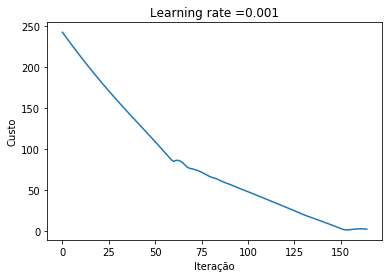

In [109]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

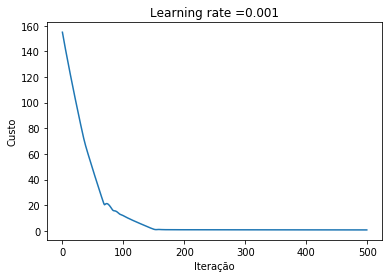

In [110]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

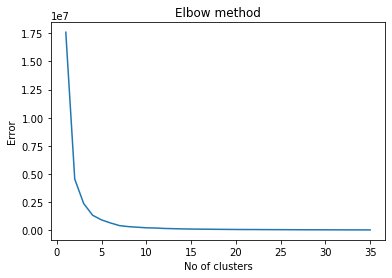

In [114]:


plt.plot(range(1,len(x_test_wine)), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Balance Scale**

In [115]:
pd.DataFrame.from_dict(balance_scale_results, orient='index')

,0
tree,100.0
knn5,85.6
knn10,90.4
mlp1,89.6
mlp2,97.6
kmeans,0.0


##### **Curva de taxa de erro em iterações da MLP1**

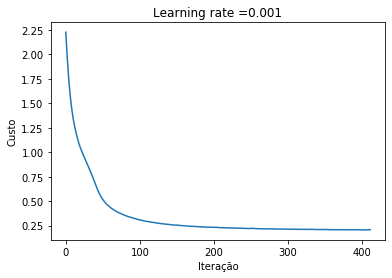

In [116]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

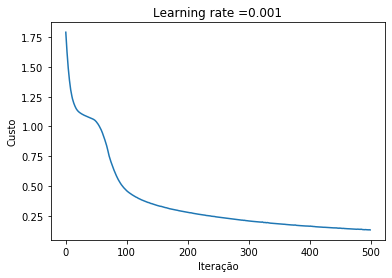

In [117]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

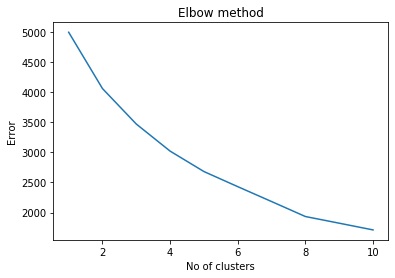

In [118]:
plt.plot(range(1,11), ErrorBalanceScaleKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Abalone**

In [119]:
pd.DataFrame.from_dict(abalone_results, orient='index')

,0
tree,100.000000
knn5,51.913876
knn10,63.397129
mlp1,53.708134
mlp2,53.468900
kmeans,0.000000


##### **Curva de taxa de erro em iterações da MLP1**

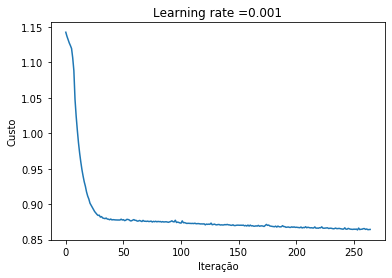

In [120]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**


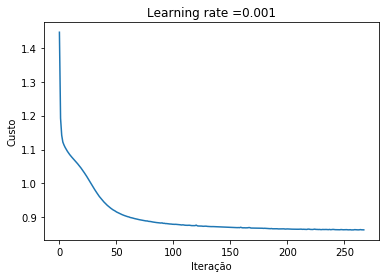

In [121]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

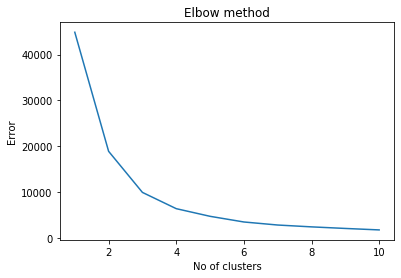

In [122]:
plt.plot(range(1,11), ErrorAbaloneKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()